In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

#### Images Shape

In [8]:
X_train[0].shape

(28, 28)

### Scale The Pixel Between 0 and 1

In [16]:
X_train=X_train/255
X_test=X_test/255

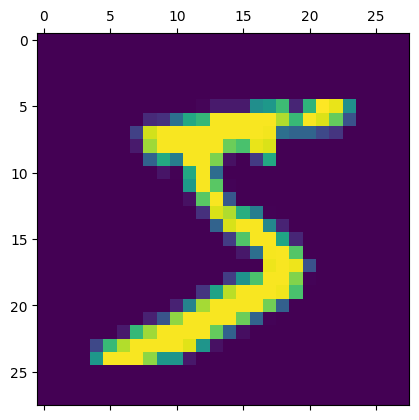

In [9]:
plt.matshow(X_train[0])

In [17]:
X_flatten=X_train.reshape(len(X_train),28*28)
X_flatten_test=X_test.reshape(len(X_test),28*28)
print(X_flatten.shape)

(60000, 784)


In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8079 - loss: 0.7330
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9119 - loss: 0.3171
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9239 - loss: 0.2721
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2569


In [19]:
model.evaluate(X_flatten_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9143 - loss: 0.3013    


[0.26508304476737976, 0.9262999892234802]

### Predict Our First Image

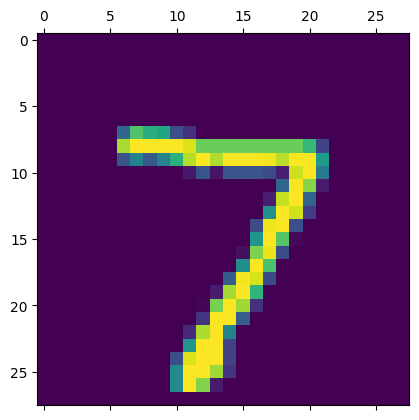

In [23]:
plt.matshow(X_test[0])

In [25]:
y_predict=model.predict(X_flatten_test)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([1.9570099e-02, 4.5636531e-07, 7.2533607e-02, 9.6552426e-01,
       2.1304493e-03, 1.2187796e-01, 1.6114658e-06, 9.9981958e-01,
       9.3473345e-02, 6.8695265e-01], dtype=float32)

In [28]:
y_predicted_labels=[np.argmax(y) for y in y_predict]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    7,  935,   17,    8,    5,   10,    9,   34,    4],
       [   1,    0,   22,  922,    0,   26,    2,   11,   20,    6],
       [   2,    2,    5,    2,  917,    0,    9,    4,    9,   32],
       [   7,    3,    5,   28,   11,  789,    9,    5,   29,    6],
       [  12,    3,    9,    1,    7,   21,  900,    2,    3,    0],
       [   1,    7,   22,    8,    6,    0,    0,  954,    1,   29],
       [   6,   10,    7,   27,    9,   35,    8,   12,  854,    6],
       [  10,    7,    1,   10,   29,    7,    0,   25,    7,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

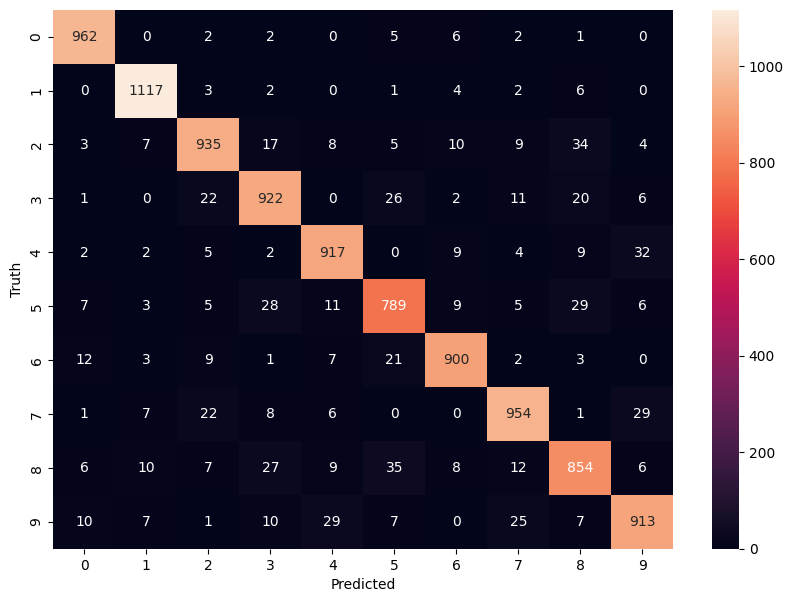

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')